In [17]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import yfinance as yf

tickers = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']
data = yf.download(tickers, start='2018-01-01', end='2024-12-31')
data.to_csv('stock_data.csv')


[*********************100%***********************]  5 of 5 completed


In [19]:
returns = data.pct_change().dropna()


<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

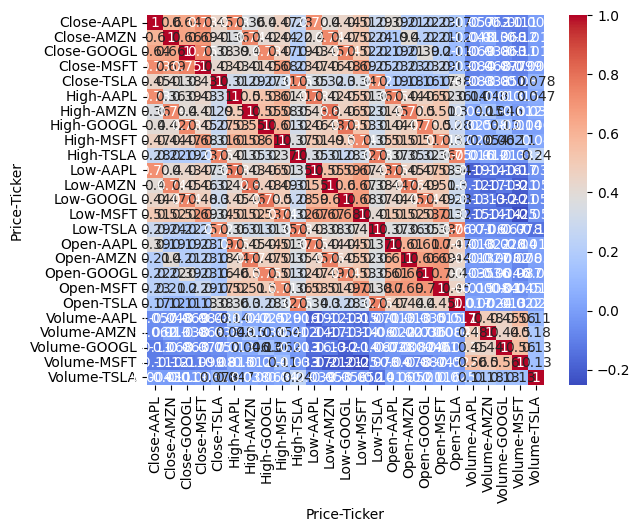

In [20]:
import seaborn as sns
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')


In [21]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:

import ta
import pandas as pd

In [23]:
def add_moving_averages(df, windows=[20, 50, 100]):
    for window in windows:
        df[f'MA_{window}'] = df['Close'].rolling(window=window).mean()
    return df


In [24]:
from ta.momentum import RSIIndicator

def add_rsi(df, window=14):
    rsi = RSIIndicator(close=df['Close'], window=window)
    df['RSI'] = rsi.rsi()
    return df


In [25]:
from ta.trend import MACD

def add_macd(df):
    macd = MACD(close=df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_Signal'] = macd.macd_signal()
    df['MACD_Diff'] = macd.macd_diff()
    return df


In [26]:
def compute_indicators(ticker):
    df = yf.download(ticker, start='2020-01-01', end='2024-12-31')
    df = df[['Close']]
    df = add_moving_averages(df)
    df = add_rsi(df)
    df = add_macd(df)
    return df.dropna()


In [27]:
def compute_indicators(ticker):
    df = yf.download(ticker, start='2020-01-01', end='2024-12-31')
    df = df[['Close']]
    df = add_moving_averages(df)
    df = add_rsi(df)
    df = add_macd(df)
    return df.dropna()


In [28]:
import plotly.graph_objects as go

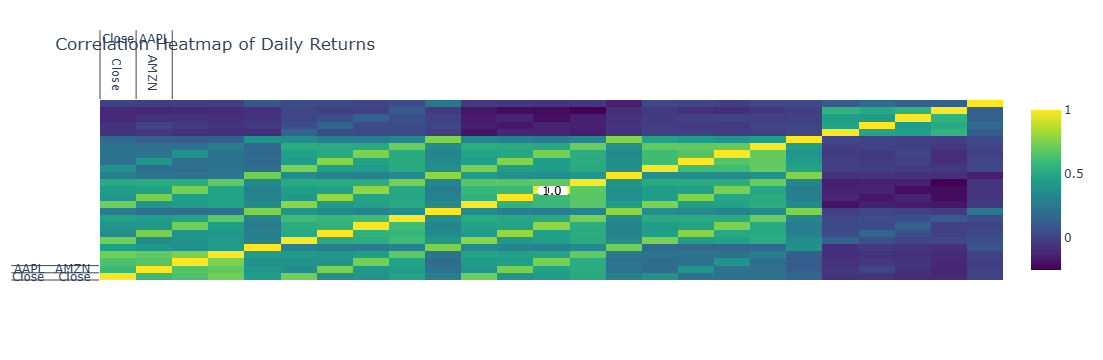

In [29]:
import plotly.figure_factory as ff

corr = returns.corr().round(2)

fig = ff.create_annotated_heatmap(
    z=corr.values,
    x=corr.columns.tolist(),
    y=corr.index.tolist(),
    annotation_text=corr.values,
    colorscale='Viridis',
    showscale=True
)

fig.update_layout(title='Correlation Heatmap of Daily Returns')
fig.show()


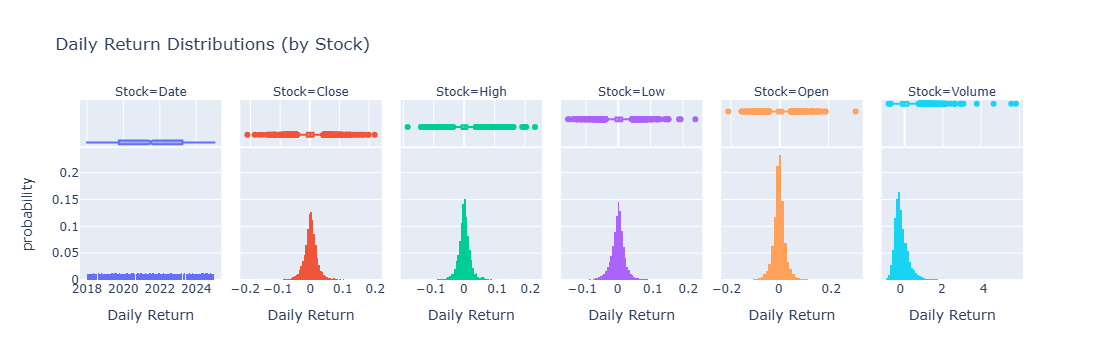

In [33]:
import plotly.express as px
returns_long = returns.reset_index().melt(var_name='Stock', value_name='Daily Return')

fig = px.histogram(
    returns_long,
    x='Daily Return',
    facet_col='Stock',
    color='Stock',
    nbins=100,
    title='Daily Return Distributions (by Stock)',
    marginal='box',
    histnorm='probability'
)
fig.update_layout(showlegend=False)
fig.show()


In [34]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: streamlit in c:\users\hp\appdata\local\programs\python\python311\lib\site-packages (1.44.1)




[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


In [37]:
import streamlit as st
import yfinance as yf
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff

st.title("📊 Stock Return Analysis")

# Sidebar
st.sidebar.header("Select Parameters")
tickers = st.sidebar.multiselect("Choose Stocks", ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA'], default=['AAPL', 'MSFT'])
start_date = st.sidebar.date_input("Start Date", pd.to_datetime('2020-01-01'))
end_date = st.sidebar.date_input("End Date", pd.to_datetime('2024-12-31'))

# Load data
@st.cache_data
def load_data(tickers, start, end):
    data = yf.download(tickers, start=start, end=end)
    return data

data = load_data(tickers, start_date, end_date)
returns = data.pct_change().dropna()

# 📌 Correlation Heatmap
if len(tickers) > 1:
    st.subheader("Correlation Heatmap of Daily Returns")
    corr = returns.corr().round(2)
    heatmap = ff.create_annotated_heatmap(
        z=corr.values,
        x=corr.columns.tolist(),
        y=corr.index.tolist(),
        annotation_text=corr.values,
        colorscale='Viridis',
        showscale=True
    )
    st.plotly_chart(heatmap)

# 📌 Histogram of Daily Returns
st.subheader("Histogram of Daily Return Distributions")


hist_fig = px.histogram(
    returns,
    x=('Close','AAPL'),
    facet_col=('Volume', 'AAPL'),
    color=('Volume', 'AAPL'),
    nbins=100,
    title='Daily Return Distributions',
    histnorm='probability'
)

st.plotly_chart(hist_fig)

st.caption("Built with Streamlit & Plotly")


2025-04-22 15:05:41.382 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 15:05:42.401 
  command:

    streamlit run C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-04-22 15:05:42.401 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 15:05:42.405 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 15:05:42.407 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 15:05:42.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 15:05:42.412 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-22 15:05:42.

DeltaGenerator()